<a href="https://colab.research.google.com/github/MrXisOnline/ML-AI/blob/master/house_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz

--2023-03-25 10:07:31--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>] 385.42M  51.1MB/s    in 5.8s    

2023-03-25 10:07:37 (66.3 MB/s) - ‘train.tar.gz’ saved [404141560/404141560]

--2023-03-25 10:07:37--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  65.2MB/s    in 4.4s    

2023-03-25 10:07:41 (59.7 MB/s) - ‘test.tar.gz’ saved [276555967/2

In [2]:
!tar -zxf /content/train.tar.gz
!tar -zxf /content/test.tar.gz

In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, optimizers, losses, utils
import matplotlib.pyplot as pyplot
import random
import numpy as np
import matplotlib.image as mpimg
from IPython.display import clear_output

In [4]:
x = []
for i, f in enumerate(os.listdir("/content/train")):
    if f != 'digitStruct.mat':
        x.append(f)
    else:
        print(i)

5165


In [5]:
len(x)

33403

In [6]:
for i, f in enumerate(x):
    if f=="1.png":
        print(i, f)

19564 1.png


Text(0.5, 1.0, '131.png')

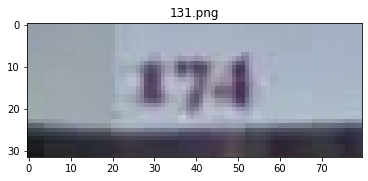

In [7]:
pyplot.imshow(mpimg.imread(os.path.join("/content/train", x[25919])))
pyplot.title(x[25919])

In [10]:
!wget https://raw.githubusercontent.com/MrXisOnline/ML-AI/master/json.json

--2023-03-25 10:05:51--  https://raw.githubusercontent.com/MrXisOnline/ML-AI/master/json.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9764851 (9.3M) [text/plain]
Saving to: ‘json.json’

json.json           100%[===================>]   9.31M  --.-KB/s    in 0.03s   

2023-03-25 10:05:51 (275 MB/s) - ‘json.json’ saved [9764851/9764851]



In [8]:
import json
f = open('/content/json.json')
data = json.load(f)
print(data)
# for i in data['emp_details']:
#     print(i)
  
# Closing file
f.close()

Mounted at /content/drive


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
images = np.empty(shape=(0, 256, 256, 3))
labels = np.empty(shape=(0, 1))
for i, d in enumerate(data):
    label = ''
    for box in d["boxes"]:
        label += str(int(float(box["label"])))
    images = np.append(images, [tf.image.resize(mpimg.imread(os.path.join("/content/train", d["filename"])), [256, 256])], axis=0)
    labels = np.append(labels, [np.array([int(label)])], axis=0)
    if i%334 == 0:
        clear_output()
        print(f"Progress {'='*((i//334)//5)}> {round(i/33403, 2)*100}%")

Progress > 2.0%


KeyboardInterrupt: ignored

In [15]:
images[:5]

array([[[[0.42496938, 0.44065565, 0.38203892],
         [0.42583188, 0.44998172, 0.39282593],
         [0.43601409, 0.43651798, 0.40764564],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.4356924 , 0.45137867, 0.39264804],
         [0.4238081 , 0.45193607, 0.40158969],
         [0.44080609, 0.43679264, 0.42926845],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.43599549, 0.45850185, 0.4032782 ],
         [0.4271293 , 0.45547146, 0.42425212],
         [0.43850335, 0.43272826, 0.44794732],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.07892594, 0.08284751, 0.09792432],
         [0.08181135, 0.08302424, 0.0899023 ]

In [ ]:
def print_image(size=(5, 5)):
    pyplot.figure(figsize=(12, 7))
    for i in range(1, size[0]*size[1]+1):
        pyplot.subplot(*size, i)
        path, label = labels[random.randint(0, len(labels)-1)]
        pyplot.imshow(mpimg.imread(os.path.join("/content/train", path)))
        pyplot.grid(False)
        pyplot.axis(False)
        pyplot.title(label)

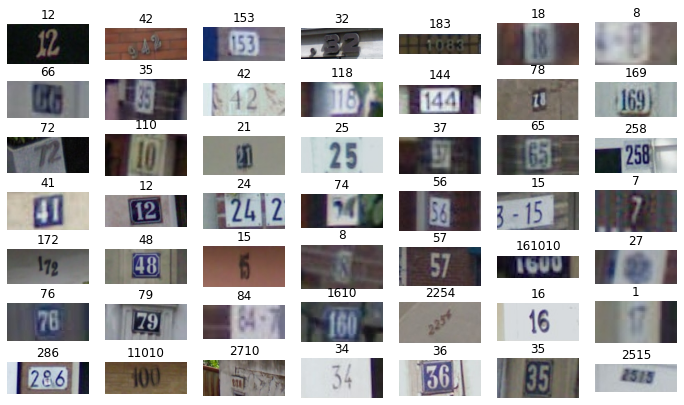

In [ ]:
print_image((7, 7))

In [ ]:
model1 = Sequential([layers.Conv2D(64, 5, activation="relu"), 
                     layers.Conv2D(64, 5, activation="relu"), 
                     layers.MaxPool2D(), 
                     layers.Conv2D(64, 3, activation="relu"), 
                     layers.Conv2D(64, 3, activation="relu"), 
                     layers.MaxPool2D(), 
                     layers.Flatten(), 
                     layers.Dense(1)])